In [63]:
import pandas as pd
import numpy as np


In [64]:
df=pd.read_csv("loan_data.csv")

In [65]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [67]:
df['loan_int_rate'].corr(df['credit_score'])

np.float64(0.011497752329653641)

In [68]:
df['loan_percent_income'].corr(df['credit_score'])

np.float64(-0.01148309587117947)

In [ ]:
df=df.drop( columns=['loan_int_rate','person_gender'])

In [ ]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [71]:
df['loan_status'].value_counts()


loan_status
0    35000
1    10000
Name: count, dtype: int64

In [72]:
df=df.drop_duplicates()

In [73]:
cat_columns=df.select_dtypes(include=['object']).columns

In [ ]:
print(cat_columns)

: 

In [75]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False)

# Use actual data: df[cat_columns]
encoded = ohe.fit_transform(df[cat_columns])

# Create DataFrame with correct column names
df_ohe = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_columns))




In [76]:
df_1=df.drop(columns=cat_columns)

In [77]:
df_encoded=pd.concat([df_ohe,df_1],axis=1)

In [78]:
df_encoded

,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,22.0,71948.0,0,35000.0,0.49,3.0,561,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,21.0,12282.0,0,1000.0,0.08,2.0,504,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,25.0,12438.0,3,5500.0,0.44,3.0,635,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,23.0,79753.0,0,35000.0,0.44,2.0,675,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,24.0,66135.0,1,35000.0,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,27.0,47971.0,6,15000.0,0.31,3.0,645,1
44996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,37.0,65800.0,17,9000.0,0.14,11.0,621,1
44997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,33.0,56942.0,7,2771.0,0.05,10.0,668,1
44998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,29.0,33164.0,4,12000.0,0.36,6.0,604,1


In [84]:
X=df_encoded.drop(columns='loan_status')
Y=df_encoded['loan_status']

In [85]:
df_encoded['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
sm=SMOTE(random_state=42)
X_resampled,Y_reampled=sm.fit_resample(X,Y)

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_reampled,test_size=0.2,random_state=42)

In [ ]:
xgbmodel=XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

In [90]:
xgbmodel.fit(X_train,Y_train)
Y_pred=xgbmodel.predict(X_test)

In [91]:
print("Accuracy",accuracy_score(Y_test,Y_pred)*100)

Accuracy 93.88571428571429


In [92]:
from sklearn.metrics import roc_auc_score

# y_test = true labels
# y_prob = predicted probabilities for positive class (not 0/1)
y_prob = xgbmodel.predict_proba(X_test)[:, 1]  # positive class probability

roc_accu = roc_auc_score(Y_test, y_prob)
print("ROC-AUC:", roc_accu)


ROC-AUC: 0.9891153314695988


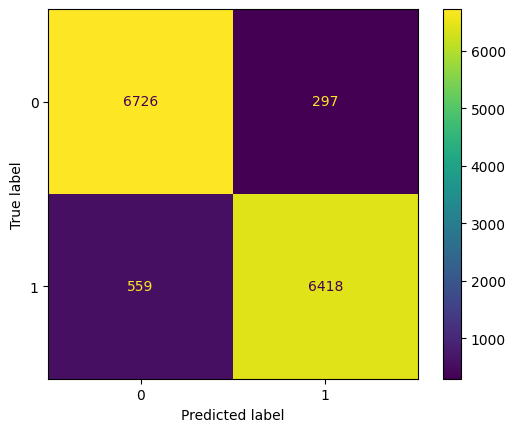

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = xgbmodel.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [96]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7023
           1       0.96      0.92      0.94      6977

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_reampled, test_size=0.2, random_state=42, stratify=Y_reampled
)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 0.1, 0.2]
}
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',  # use ROC-AUC for imbalanced data
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best ROC-AUC score:", grid.best_score_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
